In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
Data=pd.read_csv("C:\\Users\\koné aicha koty\\Desktop\\titanic-passengers.csv",delimiter=";")

In [3]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [4]:
Data.isnull().sum()#trouver les valeurs null sur toutes la dataframe

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
Data["Age"].isnull().sum()

177

In [6]:
Data["Age"].fillna(Data["Age"].mean(),inplace=True)

In [7]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
Data.drop(["Cabin"],axis=1,inplace=True)

In [9]:
Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
Data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
Data["Embarked"].fillna("s",inplace=True)

In [12]:
Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

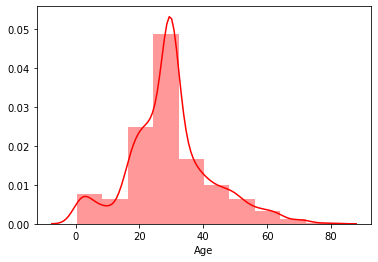

In [13]:
d=sns.distplot(Data["Age"],bins=10,hist=True,kde=True ,color="red")


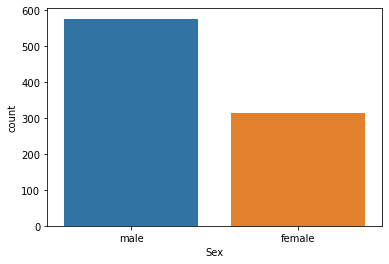

In [14]:
sns.countplot(x='Sex',data=Data)


In [15]:
#g=sns.FacetGrid(Data,col='Sex')
#g.map(plt.hist,'Age',bins=20)

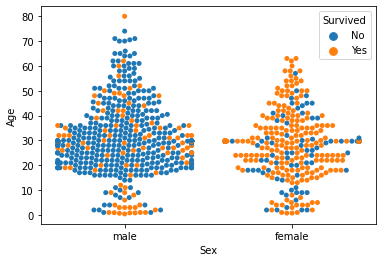

In [16]:
sns.swarmplot(y=Data["Age"],x=Data["Sex"],hue=Data["Survived"])

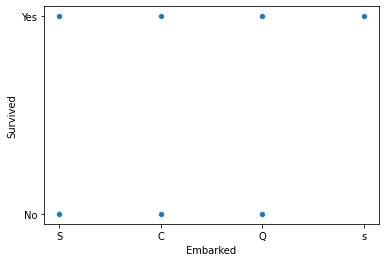

In [17]:
sns.scatterplot(x=Data["Embarked"],y=Data["Survived"])

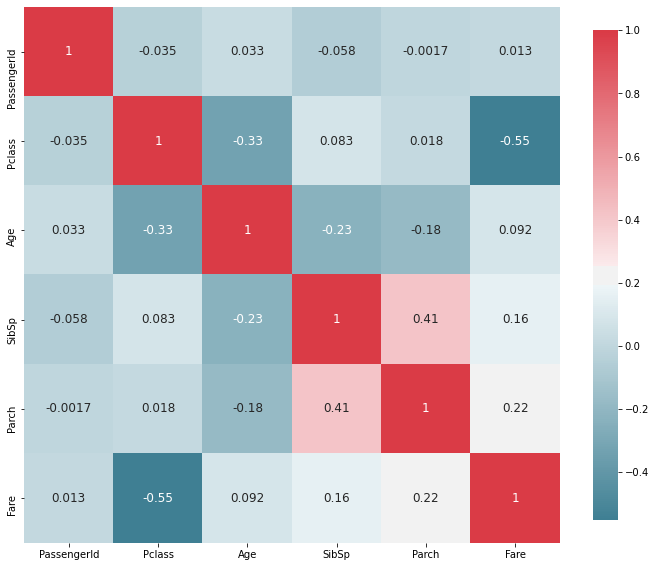

In [18]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(Data)

In [19]:
l=Data["Name"].str.split(',',expand=True)
Data['Title']=l[0]
Data['Name']= l[1]

Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,No,2,Mr. Erik Gustaf,male,28.000000,0,0,248740,13.0000,S,Collander
1,76,No,3,Mr. Sigurd Hansen,male,25.000000,0,0,348123,7.6500,S,Moen
2,641,No,3,Mr. Hans Peder,male,20.000000,0,0,350050,7.8542,S,Jensen
3,568,No,3,Mrs. Nils (Alma Cornelia Berglund),female,29.000000,0,4,349909,21.0750,S,Palsson
4,672,No,1,Mr. Thornton,male,31.000000,1,0,F.C. 12750,52.0000,S,Davidson
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Mrs. Nicholas (Adele Achem),female,14.000000,1,0,237736,30.0708,C,Nasser
887,61,No,3,Mr. Orsen,male,22.000000,0,0,2669,7.2292,C,Sirayanian
888,535,No,3,Miss. Marija,female,30.000000,0,0,315084,8.6625,S,Cacic
889,102,No,3,"Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Petroff


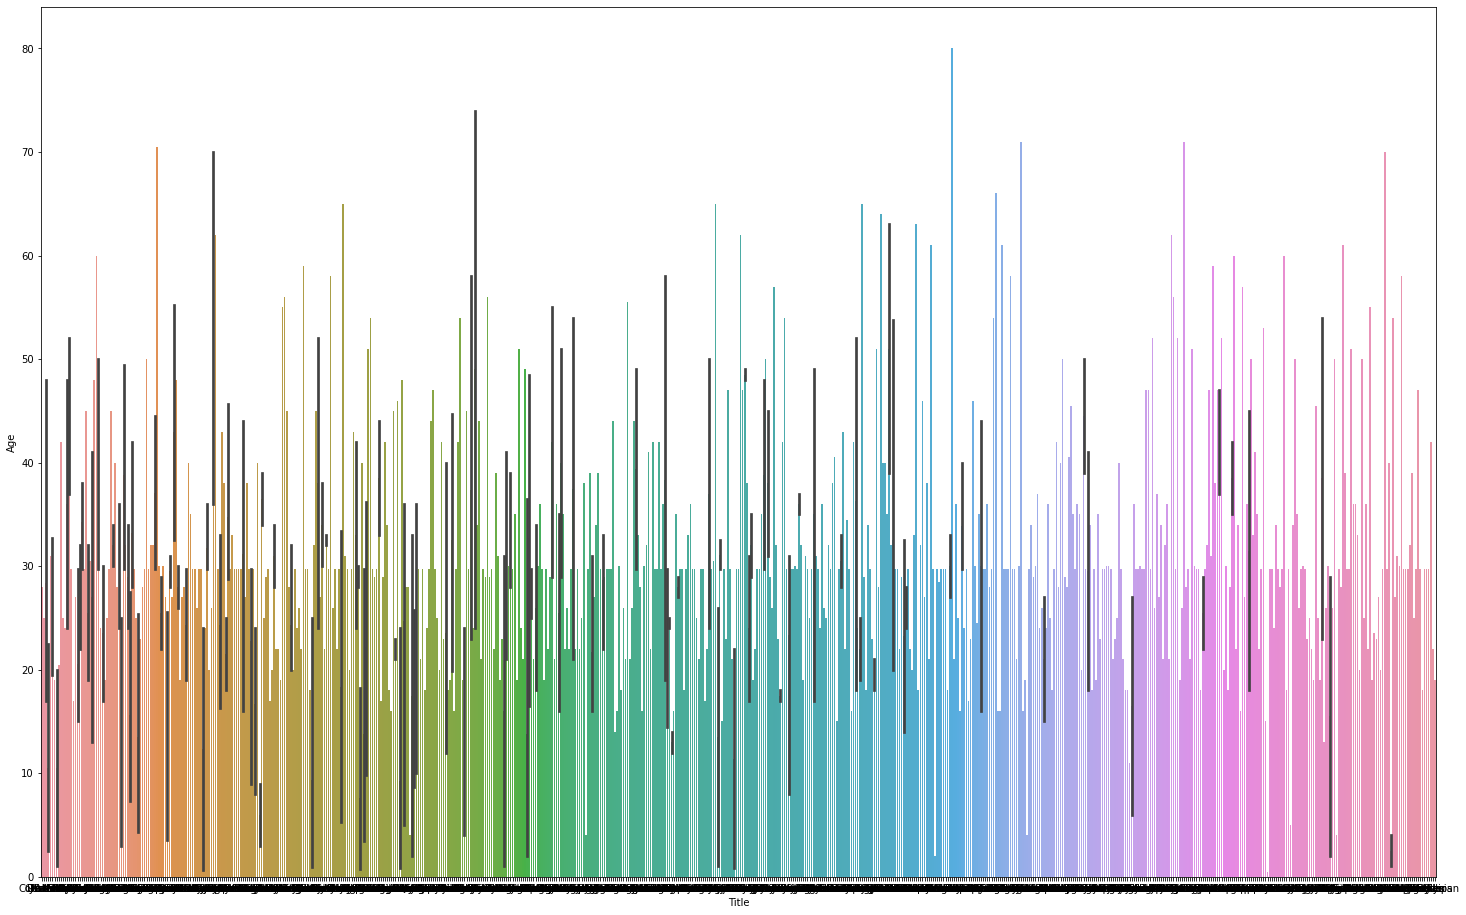

In [20]:
plt.figure(figsize=(25,16))
sns.barplot(x=Data['Title'],y=Data['Age'])

In [21]:
l=Data["Name"].str.split('.',expand=True)
Data['Title']=l[0]
Data['Name']= l[1]

Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,No,2,Erik Gustaf,male,28.000000,0,0,248740,13.0000,S,Mr
1,76,No,3,Sigurd Hansen,male,25.000000,0,0,348123,7.6500,S,Mr
2,641,No,3,Hans Peder,male,20.000000,0,0,350050,7.8542,S,Mr
3,568,No,3,Nils (Alma Cornelia Berglund),female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,No,1,Thornton,male,31.000000,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Nicholas (Adele Achem),female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,No,3,Orsen,male,22.000000,0,0,2669,7.2292,C,Mr
888,535,No,3,Marija,female,30.000000,0,0,315084,8.6625,S,Miss
889,102,No,3,"Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mr


In [22]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                   }


In [24]:
Data['Title'].replace(Title_Dictionary,inplace=True)#df['Title'] = df['Title'].map(Title_Dictionary) meme fonctionnalité
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,No,2,Erik Gustaf,male,28.000000,0,0,248740,13.0000,S,Mr
1,76,No,3,Sigurd Hansen,male,25.000000,0,0,348123,7.6500,S,Mr
2,641,No,3,Hans Peder,male,20.000000,0,0,350050,7.8542,S,Mr
3,568,No,3,Nils (Alma Cornelia Berglund),female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,No,1,Thornton,male,31.000000,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Nicholas (Adele Achem),female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,No,3,Orsen,male,22.000000,0,0,2669,7.2292,C,Mr
888,535,No,3,Marija,female,30.000000,0,0,315084,8.6625,S,Miss
889,102,No,3,"Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mr


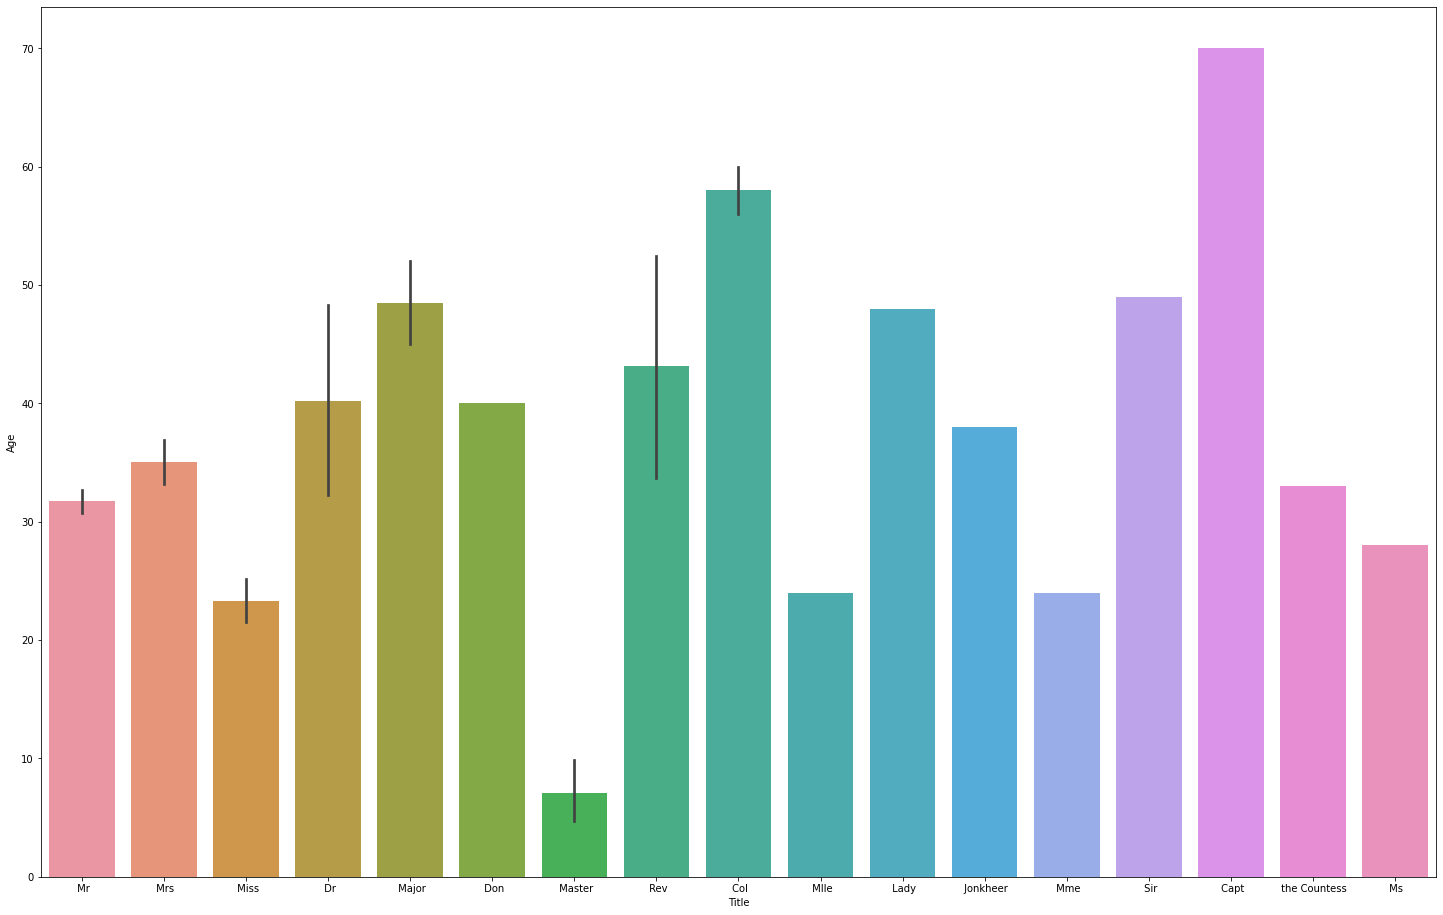

In [25]:
plt.figure(figsize=(25,16))
sns.barplot(x=Data['Title'],y=Data['Age'])

In [28]:
Data["Familysize"]= Data["Parch"]+Data["SibSp"]+1
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Familysize
0,343,No,2,Erik Gustaf,male,28.000000,0,0,248740,13.0000,S,Mr,1
1,76,No,3,Sigurd Hansen,male,25.000000,0,0,348123,7.6500,S,Mr,1
2,641,No,3,Hans Peder,male,20.000000,0,0,350050,7.8542,S,Mr,1
3,568,No,3,Nils (Alma Cornelia Berglund),female,29.000000,0,4,349909,21.0750,S,Mrs,5
4,672,No,1,Thornton,male,31.000000,1,0,F.C. 12750,52.0000,S,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Nicholas (Adele Achem),female,14.000000,1,0,237736,30.0708,C,Mrs,2
887,61,No,3,Orsen,male,22.000000,0,0,2669,7.2292,C,Mr,1
888,535,No,3,Marija,female,30.000000,0,0,315084,8.6625,S,Miss,1
889,102,No,3,"Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mr,1


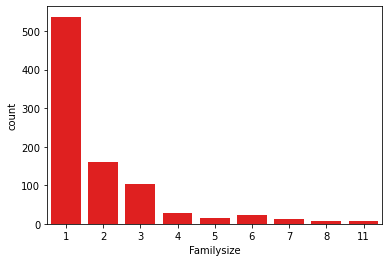

In [30]:
f=sns.countplot(Data["Familysize"],color="red")